# 🧠 Simple ARIMA Time Series Forecasting (COVID-19 India)
---
This notebook performs a **simple ARIMA model** on daily COVID-19 cases in India for time series forecasting.
Download dataset from Kaggle: [COVID-19 in India](https://www.kaggle.com/datasets/sudalairajkumar/covid19-in-india)

In [1]:
# STEP 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\Users\chait\AppData\Local\Temp\ipykernel_22136\1112357382.py:3: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


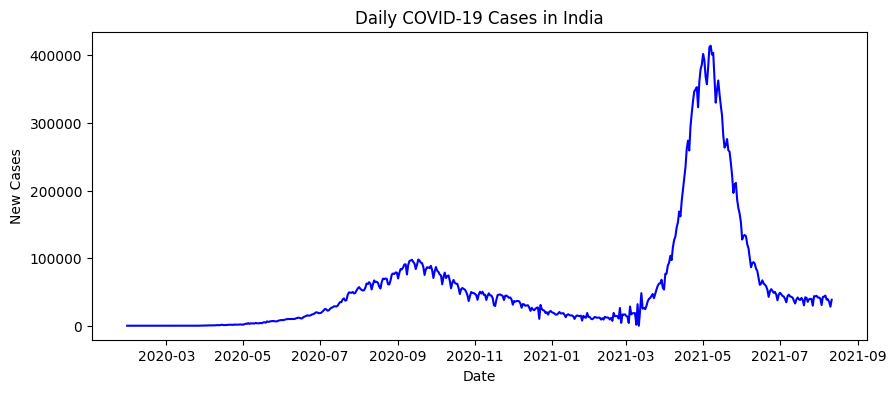

In [2]:
# STEP 2: Load dataset
df = pd.read_csv('covid_19_india.csv')
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# STEP 3: Prepare data
data = df.groupby('Date')['Confirmed'].sum().reset_index()
data['New_Cases'] = data['Confirmed'].diff().fillna(0)

# Plot daily cases
plt.figure(figsize=(10,4))
plt.plot(data['Date'], data['New_Cases'], color='blue')
plt.title('Daily COVID-19 Cases in India')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()

In [3]:
# STEP 4: Check stationarity
def check_stationarity(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    if result[1] <= 0.05:
        print('✅ Stationary')
    else:
        print('❌ Not stationary')

check_stationarity(data['New_Cases'])

ADF Statistic: -3.152131188676036
p-value: 0.02292816691666367
✅ Stationary


In [4]:
# STEP 5: Fit ARIMA model (p,d,q = 2,1,2)
model = ARIMA(data['New_Cases'], order=(2,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              New_Cases   No. Observations:                  560
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -5792.618
Date:                Mon, 10 Nov 2025   AIC                          11595.237
Time:                        20:11:42   BIC                          11616.868
Sample:                             0   HQIC                         11603.684
                                - 560                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1212      0.175      0.694      0.488      -0.221       0.464
ar.L2          0.8047      0.162      4.965      0.000       0.487       1.122
ma.L1         -0.0222      0.164     -0.135      0.8

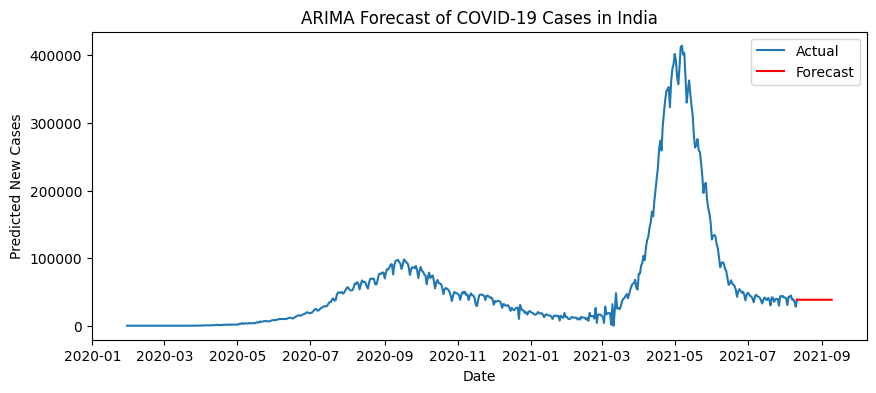

In [5]:
# STEP 6: Forecast next 30 days
forecast = model_fit.forecast(steps=30)
future_dates = pd.date_range(data['Date'].iloc[-1], periods=30, freq='D')

# Plot forecast
plt.figure(figsize=(10,4))
plt.plot(data['Date'], data['New_Cases'], label='Actual')
plt.plot(future_dates, forecast, color='red', label='Forecast')
plt.title('ARIMA Forecast of COVID-19 Cases in India')
plt.xlabel('Date')
plt.ylabel('Predicted New Cases')
plt.legend()
plt.show()

✅ **Conclusion:**
- ARIMA(2,1,2) model was applied to forecast daily new COVID-19 cases.
- It provides short-term predictions and shows the trend clearly.
- This is a simple and easy approach for time series forecasting.